<a href="https://colab.research.google.com/github/JuanDa14Sa/IAM/blob/main/Trabajo_1_IAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 1-Introducción al aprendizaje de maquina**

**Juan David Sánchez Murcia**

**Exercise 1.2**
*   a) Palabras como gratis, barato, caliente, ganar y dinero.
*   b) Palabras como hola, buenas tardes-días y el nombre del receptor del correo.
*   c) El treshold o bias del perceptron, es decir el parametro $b$.


**Exercise 1.3**

*   a) De acuerdo a la pista, si $x(t)$ es mal clasificado por $w(t)$ entonces $sign(w^Tx)\neq sign(y)$ entonces por ley de signos tenemos $y(t)w^T(t)x(t)<0$.
*   b) Como $x(t)$ es mal clasificado entonces debemos actualizar $w(t+1)$ con la regla $w(t+1)=w(t)+y(t)x(t)$, de donde 
$$\begin{align*}y(t)w^T(t+1)x(t)&=y(t)(w(t)+y(t)x(t))^Tx(t)\\
&=y(t)w^T(t)x(t)+y(t)y(t)x^T(t)x(t) ,\end{align*}$$
como el ultimo sumando es mayor o igual a 0, entonces $y(t)w^T(t+1)x(t)\geq y(t)w^T(t)x(t)$.
*   c) Separemos el problema en dos casos:

  Si $y(t)$ es positivo, por el resultado eanterior tenemos que $y(t)w^T(t)x(t)$ es creciente, además como $x(t)$ es mal clasificado entonces $w^T(t)x(t)<0$, de donde $w(t+1)=w(t)+y(t)x(t)>w(t)$, así que $w^T(t+1)x(t)$ está acercandose a ser positivo.

  Si $y(t)$ es negativo entonces $w^T(t)x(t)$ es positivo, así que como $y(t)w^T(t)x(t)$ crece, entonces debe ocurrir que $w^T(t)x(t)$ se esté acercando a ser negativo.

  En cualquier caso, concluimos que se está realizando el "movimiento correcto".


**Exercise 1.10**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
def flipCoins(nCoins):
      return np.random.binomial(1,0.5,nCoins)

def flipCoinsFreq(nCoins,nTrials,doPrint):
  numOfHeads=np.zeros(nCoins)
  for i in range(nTrials):
    numOfHeads+=flipCoins(nCoins)
  
  headFreq=numOfHeads/nTrials

  v1=headFreq[0]
  vmin=np.min(headFreq)
  vrand=np.random.choice(headFreq)
  mu=(v1+vmin+vrand)/3
  if(doPrint):
    print("La primera frecuencia es: ",v1)
    print("La menor frecuencia es: ",vmin)
    print("Una frecuencia aleatoria es: ",vrand)
    print("El promedio de estas tres frecuencias es: ",mu)

  return v1,vmin,vrand

In [4]:
# a).
flipCoinsFreq(1000,10,True)

La primera frecuencia es:  0.2
La menor frecuencia es:  0.0
Una frecuencia aleatoria es:  0.4
El promedio de estas tres frecuencias es:  0.20000000000000004


(0.2, 0.0, 0.4)

Text(0.5, 0, 'vmins')

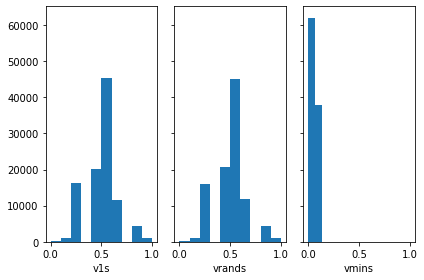

In [40]:
# b).
v1s,vmins,vrands=[],[],[]
for i in range(100000):
  v1Tmp,vminTmp,vrandTmp=flipCoinsFreq(1000,10,False)
  v1s.append(v1Tmp)
  vmins.append(vminTmp)
  vrands.append(vrandTmp)
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True,sharex=True)
axs[0].hist(v1s, bins=10)
axs[0].set_xlabel('v1s')
axs[1].hist(vrands,bins=10)
axs[1].set_xlabel('vrands')
axs[2].hist(vmins, bins=3)
axs[2].set_xlabel('vmins')

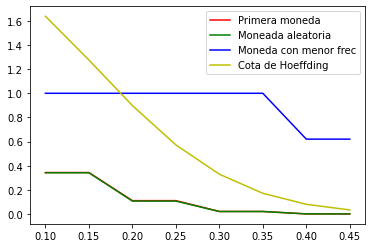

In [52]:
# c).
def hoeffding(eps,n):
  return 2*np.exp(-2*n*eps**2)
  
eps=np.arange(0.1,0.5,0.05)
b1,brand,bmin=np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))
bhoeffding=hoeffding(eps,10)
for i in range(len(eps)):
  b1[i]=np.sum(np.abs(np.array(v1s)-0.5)>eps[i])/100000
  brand[i]=np.sum(np.abs(np.array(vrands)-0.5)>eps[i])/100000
  bmin[i]=np.sum(np.abs(np.array(vmins)-0.5)>eps[i])/100000

plt.plot(eps, b1,  color='r',label='Primera moneda')
plt.plot(eps, brand, color='g',label='Moneada aleatoria')
plt.plot(eps, bmin,  color='b',label='Moneda con menor frec')
plt.plot(eps,bhoeffding,color='y',label='Cota de Hoeffding')
plt.legend()

*   d) Las monedas $c_1$ y $c_{rand}$ van a obedecer la desigualdad de Hoeffding, ya que ellas son escogidas antes de generar los datos.

La moneda $c_{min}$ no va a obedecer la desigualdad de Hoeffding, ya que está es escogida después de evaluar todos los datos, así que depende de estos mismos.

*  e) Seleccionar la moneda con menor frecuencia es como seleccionar la función $h_i$ que menos errores halla tenido dentro de la muestra, sin embargo, como ya vimos, esto no es garantía de que vaya a realizar menos errores en la población total, ya que la cota de Hoeffding no aplicaría a la función escogida despues de analizar los datos. 

**Exercise 1.11**

*   a) De forma similar al problema visto en clase, acerca del color rojo o negro, aunque la hipótesis escogida por S se desempeñe muy bien en la muestra, no existe garantía de que lo haga por fuera, por ejemplo, nuestra hipótesis es la función constante $+1$, pero el espacio fuera de $D$ puede estar compuesto unicamente de $-1$, ya que no lo conocemos. 

Ahora, si usamos el algoritmo C entonces vamos a tener una probabilidad de $1/2$ de haber acertado por fuera del espacio $D$.

*   b) Por lo dicho anteriormente, es probable que C se desempeñe mejor que S por fuera de $D$.
*  c) Dado que $D$ solo está compuesto de $+1$'s y $P[f(x)=+1]=0.9$ entonces S tiene un $90\%$ de acertar, mientras que $C$ tiene un $10\%$.
*   d) Si $p<0.5$, ya que C escogería la función $h_2(x)$ y las probabilidades de que acierte dado que S escogio $h_1(x)$ son mayores o iguales a $50\%$.

**Relación de $\frac{R^2\|\theta^*\|^2}{\gamma^2}$**

Siguiendo a partir de la demostración vista en clase sobre el perceptron, tenemos que $$\frac{k\gamma}{\sqrt{kR^2}\|\theta^*\|}\leq cos(\theta^*,\theta^{(k)}),$$ donde $R$ es el radio de la bola que acota nuestros datos,$\theta^*$ es el parámetro ideal de clasificación y $\gamma$ es el margen que nos garantiza la existencia de un clasificador linear.

Ahora, como $cos$ es una función acotada por $1$, entonces: $$\frac{k\gamma}{\sqrt{kR^2}\|\theta^*\|}\leq 1,$$ así que si despejamos $k$, es decir el número de pasos de nuestro algoritmo, obtenemos: $$k\leq \frac{R^2\|\theta^*\|^2}{\gamma^2}.$$

La interpretación que le podemos dar a está cota, dado que $k$ son los pasos de nuestro algortimo, es que $\frac{R^2\|\theta^*\|^2}{\gamma^2}$ resulta ser un estimado de la complejidad del algoritmo. Esto cuadra con la intuición, ya que entre más grande sea $R$, significa que nuestros datos van a estar en un espacio grande, así que analizarlos va a resultar más costoso, de igual forma, si $\gamma$ es grande, significa que los datos estan más "separados", por lo que es más fácil separarlos mediante un plano.


**Xor function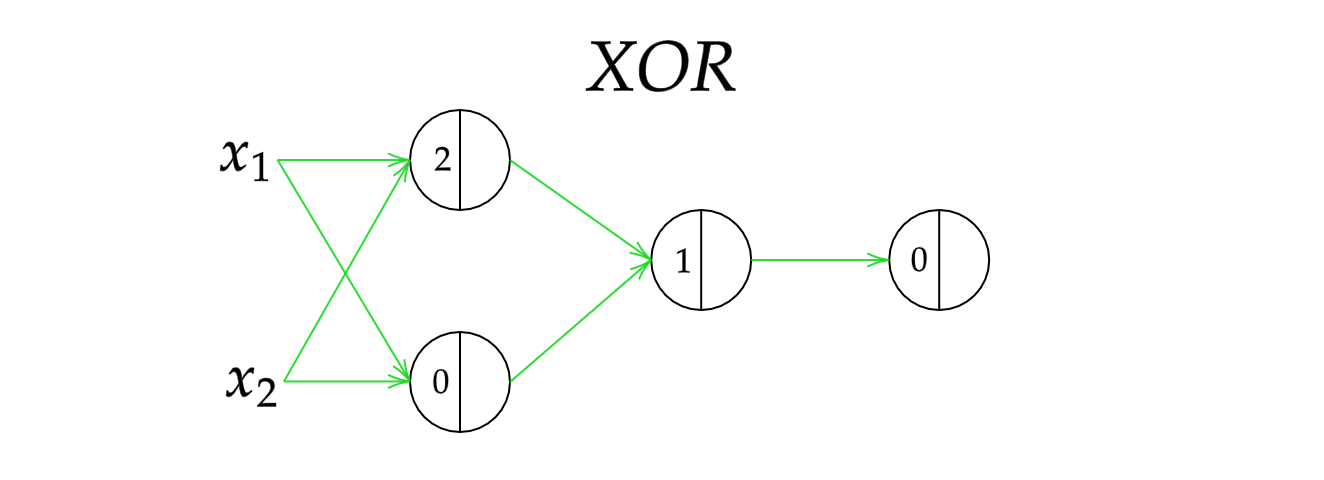**

Mediante las neuronas de McCulloch-Pitts recreamos la compuerta lógica $XOR$.